# Exponential Smoothing

### **Small $n$, big problem**
What happens to our previous models when we have a very small number of observations, and still need to make a forecast?
- What if you just have, like, two observations or something?

In [1]:
import numpy as np
import plotly.express as px

np.random.seed(seed=0)

def step(prev=0):
    return prev + np.random.normal(loc=0.05, scale=1.0)

def walk(steps=10):
    data = []
    for i in range(10):
        if i == 0:
            data.append(step())
        else:
            data.append(step(data[i-1]))
    return data

myWalk = walk(10)
px.line(myWalk)

### **Introducing...**
**Exponential Smoothing!** A model that does not care what your data looks like, or how much you have!

### **Simple Smoothing**
Our first version of this model is super simple:
1. Take a weighted average of the data
2. Forecast that value

How do we weight it? with $\alpha$!
$$
y_{y+1} = \alpha_t + \alpha(1-\alpha) y_{t-1} + \alpha(1-\alpha)^2 y_{t-2} + ...
$$
The weights on our model sum to ~1
- Alpha is used to discount past observations
    - The higher alpha is, the more we value current values. If $\alpha = 1$ then the only value that is considered is the last observation
    - The lower alpha is, the more uniformly distributed the weights of the values are. Every past observation is weighted the same
    - Each observation gets some proportion of the alpha to calculate the next period

In [3]:
data = walk(10)
data

[-2.502989815834079,
 -1.7993712203937182,
 -0.8849350215342124,
 -1.5771000419406542,
 0.7426545820469532,
 -0.6617110925518115,
 -0.5659525752503654,
 -0.7031364252761989,
 0.8796427890822587,
 2.399001558982544]

In [10]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing

data = walk(10)

for i in [0.2, 0.5, 0.8]:
    alpha = SimpleExpSmoothing(data).fit(smoothing_level=i, optimized=False)
    print(alpha.forecast(1))

[3.73520139]
[4.71347714]
[4.6513679]


- This simple exponential smoothing model will only provide a flat forecast for all future predictions

### **Not enough usefulness!**
So that is cool and simple, but what if I want a foreward-looking forecast?
- Exponential Smoothing can cover you!

### Smoothing with Trendline
Just like we could smooth past values, we can also create a smoothed trendline to include in our forecast

In [12]:
import pandas as pd

data = myWalk
trend = ExponentialSmoothing(data, trend='add').fit()
trends = pd.DataFrame([data + list(trend.forecast(10)), [0]*10 + [1]*10]).T
trends.columns = ['random_walk', 'forecast']
px.line(trends, y='random_walk', color='forecast')

### Damped Trends

In [16]:
data = myWalk
trend = ExponentialSmoothing(data, trend='add', damped_trend=True).fit()
trends = pd.DataFrame([data + list(trend.forecast(10)), [0]*10 + [1]*10]).T
trends.columns = ['random_walk', 'forecast']
px.line(trends, y='random_walk', color='forecast')

### Seasonality
Exponential Smoothing also allows for seasonality. While our current data does not have season effects, her is how we accomodate seasonality

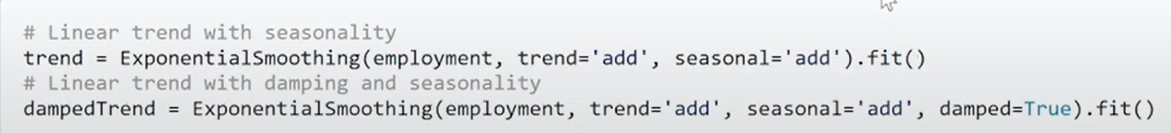